In [1]:
#Import packages:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, r2_score, classification_report
from sklearn.datasets import make_classification 
from sklearn.inspection import permutation_importance


In [27]:
#import data
redimportedData ='red_wine_scaled.csv'
red_wine = pd.read_csv(redimportedData, index_col = False)
red_wine = red_wine.drop(columns='Unnamed: 0', axis = 1)
whiteimportedData ='white_wine_scaled.csv'
white_wine = pd.read_csv(whiteimportedData, index_col = False)
white_wine = white_wine.drop(columns='Unnamed: 0', axis = 1)

In [28]:
red_wine.head()

,fixed_acidity,residual_sugar,free_sulfur_dioxide,pH,sulphates,alcohol,qual_bin
0,-0.238095,-0.428571,-0.214286,1.052632,-0.333333,-0.50,0.0
1,-0.047619,0.571429,0.785714,-0.578947,0.333333,-0.25,0.0
2,-0.047619,0.142857,0.071429,-0.263158,0.166667,-0.25,0.0
3,1.571429,-0.428571,0.214286,-0.789474,-0.222222,-0.25,0.0
4,-0.238095,-0.428571,-0.214286,1.052632,-0.333333,-0.50,0.0


In [30]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,qual_bin
0,0.2,0.090909,0.333333,1.890244,0.142857,0.478261,0.610169,-0.947368,-0.142857,-0.842105,0.0
1,-0.5,0.363636,0.166667,-0.439024,0.428571,-0.869565,-0.033898,0.631579,0.142857,-0.473684,0.0
2,1.3,0.181818,0.666667,0.207317,0.500000,-0.173913,-0.627119,0.421053,-0.214286,-0.157895,0.0
3,0.4,-0.272727,0.000000,0.402439,1.071429,0.565217,0.881356,0.052632,-0.500000,-0.263158,0.0
4,0.4,-0.272727,0.000000,0.402439,1.071429,0.565217,0.881356,0.052632,-0.500000,-0.263158,0.0


In [31]:
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_wine.drop(columns='qual_bin'), 
                                                    red_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_wine.drop(columns='qual_bin'), 
                                                    white_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)

In [55]:
white_X_test.shape

(1470, 10)

Text(0.5, 0, 'Random Forest Feature Importance - Reds')

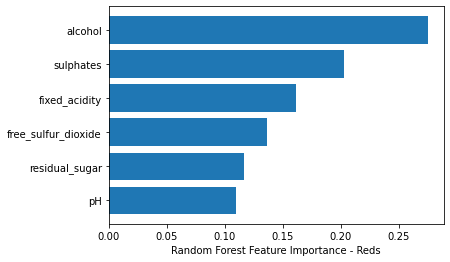

In [32]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(red_X_train, red_y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(red_wine.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance - Reds")
# High alcohol content, sulphates (anti_microbial) and lower volatile acidity (high=vinagar taste) appear to be the top three important features for red wine quality

Text(0.5, 0, 'Random Forest Feature Importance - Whites')

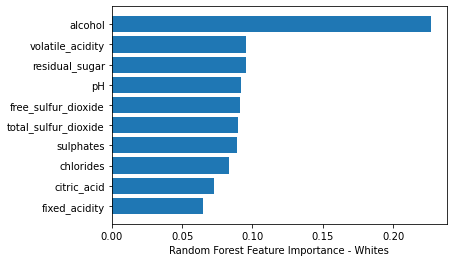

In [33]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(white_X_train, white_y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(white_wine.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance - Whites")
# High alcohol content, lower volatile acidity and higher residual sugar appear to be the top three important features for white wine quality

In [34]:
#Apply Decision Tree model to the training data and score:
red_model = DecisionTreeClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Decision Tree Classifier')
print('Red: ', red_model_score)
white_model = DecisionTreeClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Decision Tree Classifier
Red:  0.8729166666666667
White:  0.845578231292517


In [35]:
#Predict using the model and create confusion matrix again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[379  31]
 [ 30  40]]
White Confusion Matrix
[[1042  124]
 [ 103  201]]


In [36]:
#Apply Random Forest model to the training data and score:
red_model = RandomForestClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Random Forest Classifier')
print('Red: ', red_model_score)
white_model = RandomForestClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Random Forest Classifier
Red:  0.8958333333333334
White:  0.8755102040816326


In [37]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[398  12]
 [ 38  32]]
White Confusion Matrix
[[1122   44]
 [ 139  165]]


In [38]:
#Apply  Gradient Boosting Classifier model to the training data and score:
red_model = GradientBoostingClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Gradient Boosting Classifier')
print('Red: ', red_model_score)
white_model = GradientBoostingClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Gradient Boosting Classifier
Red:  0.8770833333333333
White:  0.8401360544217688


In [39]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[394  16]
 [ 43  27]]
White Confusion Matrix
[[1112   54]
 [ 181  123]]


In [40]:
#Apply KNeighborsClassifier model to the training data and score:
red_model = KNeighborsClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('KNeighbors Classifier')
print('Red: ', red_model_score)
white_model = KNeighborsClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

KNeighbors Classifier
Red:  0.8645833333333334
White:  0.8346938775510204


In [41]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[390  20]
 [ 45  25]]
White Confusion Matrix
[[1073   93]
 [ 150  154]]


In [42]:
#Apply GaussianNB model to the training data and score:
red_model = GaussianNB()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('GaussianNB Classifier')
print('Red: ', red_model_score)
white_model = GaussianNB()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

GaussianNB Classifier
Red:  0.8645833333333334
White:  0.7551020408163265


In [43]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[391  19]
 [ 46  24]]
White Confusion Matrix
[[898 268]
 [ 92 212]]


In [44]:
#Apply SVC model to the training data and score:
red_model = SVC()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('SVC Classifier')
print('Red: ', red_model_score)
white_model = SVC()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

SVC Classifier
Red:  0.8520833333333333
White:  0.8333333333333334


In [45]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[404   6]
 [ 65   5]]
White Confusion Matrix
[[1129   37]
 [ 208   96]]


I applied different ML models above and evaluated their performance for both red and white wine test data and tabulated the scores and put them in a confusion matrix. The Random Forest model appears to be the best for both red and white wines. So, I will perform a gridsearch hyperparameter tuning for that model as well determine the ROC_AUC scores and ROC curve.

In [46]:
#build param grid features
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_sample_split = [2, 5]
min_sample_leaf = [1, 2]
bootstrap = [True, False]

In [47]:
param_grid = {'n_estimators' : n_estimators, 
              'max_features' : max_features, 
              'max_depth' : max_depth, 
              'min_samples_split' : min_sample_split, 
              'min_samples_leaf' : min_sample_leaf, 
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [48]:
#GridSearchCV
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
red_gs = gs.fit(red_X_train, red_y_train)
white_gs = gs.fit(white_X_train, white_y_train)

print('Red:')
print(red_gs.best_estimator_)
print(red_gs.best_score_)

print('White:')
print(white_gs.best_estimator_)
print(white_gs.best_score_)


Red:
RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=64)
0.8286103751650291
White:
RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=64)
0.8286103751650291


In [49]:
#Fitting the Random forest model with the optimal hyperparameters
rf = RandomForestClassifier(n_estimators = 48, max_features = 'sqrt' , max_depth = 4, min_samples_split = 5, bootstrap = False)
rf.fit(red_X_train, red_y_train)
red_y_pred = rf.predict(red_X_test)
red_acc = accuracy_score(red_y_test, red_y_pred)
red_cv = cross_val_score(rf, red_X_test, red_y_test, scoring = 'roc_auc').mean()
print('Red:')
print("Accuracy Score: ", red_acc)
print("CV Score: ", red_cv)
print(" ")
print('White:')
rf.fit(white_X_train, white_y_train)
white_y_pred = rf.predict(white_X_test)
white_acc = accuracy_score(white_y_test, white_y_pred)
white_cv = cross_val_score(rf, white_X_test, white_y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", white_acc)
print("CV Score: ", white_cv)

Red:
Accuracy Score:  0.8729166666666667
CV Score:  0.8680313588850174
 
White:
Accuracy Score:  0.8115646258503402
CV Score:  0.8290011812547519


With wines, you want a high accuracy

In [50]:
#ROC-AUC Score
red_y_scores_rf = rf.predict_proba(red_X_test)
red_y_scores_rf = red_y_scores_rf[:,1]
red_auroc = roc_auc_score(red_y_test, red_y_scores_rf)
print("Red ROC-AUC Score:", red_auroc)

white_y_scores_rf = rf.predict_proba(white_X_test)
white_y_scores_rf = white_y_scores_rf[:,1]
white_auroc = roc_auc_score(white_y_test, white_y_scores_rf)
print("White ROC-AUC Score:", white_auroc)

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 6 

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(red_y_test, red_y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

print('Red wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("red_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .3 FPR

NameError: name 'red_y_scores_rf' is not defined

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(white_y_test, white_y_scores_rf)
print('White wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("white_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .2 FPR

In [57]:
# Classification Reports
print("Red: ")
print(classification_report(red_y_test, red_y_pred))
print(" ")
print("White: ")
print(classification_report(white_y_test, white_y_pred))

Red: 
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       410
         1.0       0.76      0.19      0.30        70

    accuracy                           0.87       480
   macro avg       0.82      0.59      0.61       480
weighted avg       0.86      0.87      0.84       480

 
White: 
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.89      1166
         1.0       0.72      0.14      0.24       304

    accuracy                           0.81      1470
   macro avg       0.77      0.57      0.57      1470
weighted avg       0.80      0.81      0.76      1470

